In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, manifold, model_selection, linear_model, metrics
from tqdm.notebook import tqdm

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "12",
      "figure.figsize" : [8,8]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [17]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

## part 1

In [3]:
iso = manifold.Isomap(n_neighbors=5, n_components=2)
X_iso = iso.fit_transform(X)

In [4]:
X_iso.shape

(1797, 2)

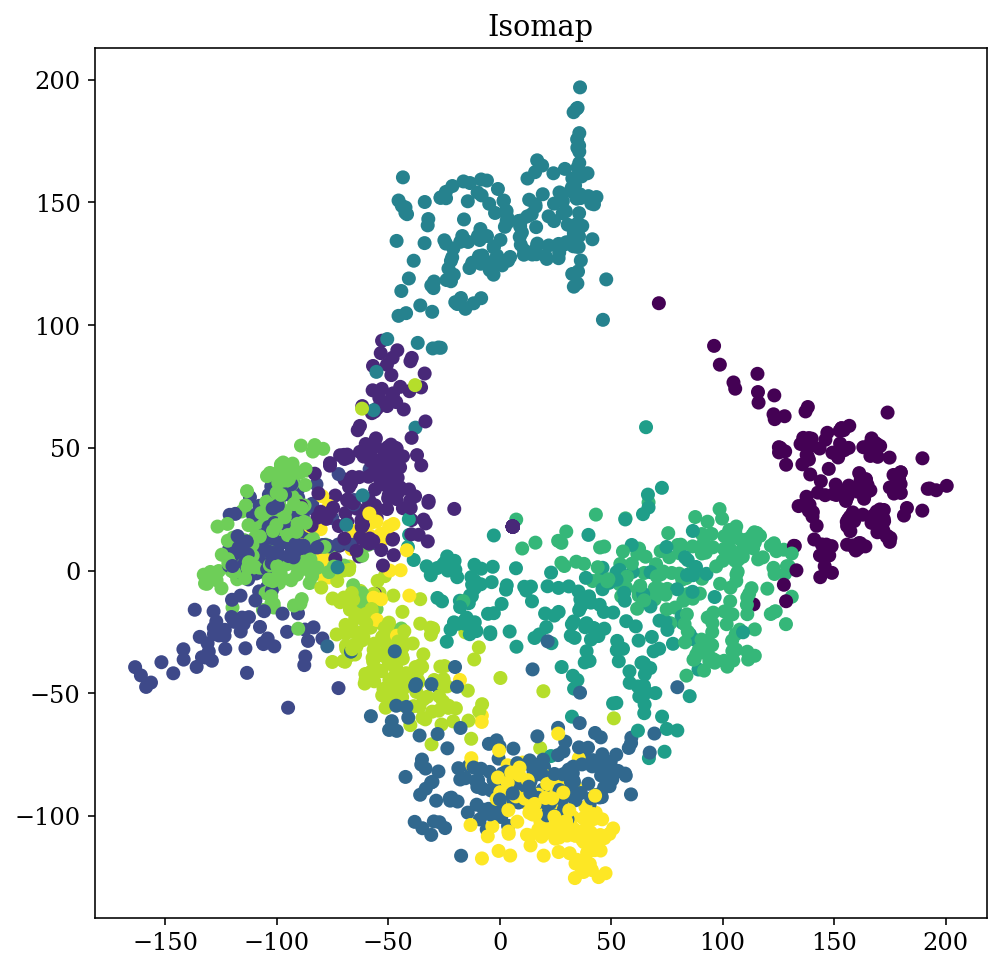

In [5]:
plt.scatter(X_iso[:,0], X_iso[:,1], c=digits.target)
plt.title('Isomap')
plt.show()

## part 2

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, digits.target, test_size=0.2)

In [7]:
clf = linear_model.LogisticRegression(penalty='l2', solver='sag').fit(X_train, y_train)

/Users/alessandrosantini/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [8]:
#train
y_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred))
print(metrics.confusion_matrix(y_train, y_pred))

1.0
[[145   0   0   0   0   0   0   0   0   0]
 [  0 144   0   0   0   0   0   0   0   0]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   0 147   0   0   0   0   0   0]
 [  0   0   0   0 143   0   0   0   0   0]
 [  0   0   0   0   0 144   0   0   0   0]
 [  0   0   0   0   0   0 148   0   0   0]
 [  0   0   0   0   0   0   0 141   0   0]
 [  0   0   0   0   0   0   0   0 136   0]
 [  0   0   0   0   0   0   0   0   0 148]]


In [33]:
#test
y_pred = clf.predict(X_test)
accuracy_LR = metrics.accuracy_score(y_test, y_pred)
print(accuracy_LR)
print(metrics.confusion_matrix(y_test, y_pred))

0.9666666666666667
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  1  0  1  0]
 [ 0  1 35  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  0  0  0]
 [ 1  0  0  0 36  0  0  1  0  0]
 [ 0  0  0  1  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  3 29]]


## SVM

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [35]:
Cs = np.linspace(0.01, 1, 10)
K = 5

grid = GridSearchCV(SVC(), {'C': Cs}, cv = K)
grid.fit(X, y)

best_C = grid.best_params_['C']

In [36]:
svm = SVC(kernel='linear', C=best_C)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy_SVM = metrics.accuracy_score(y_test, y_pred)
print(accuracy_SVM)
print(metrics.confusion_matrix(y_test, y_pred))

0.9861111111111112
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  1  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  1  0  0  0  0  1 30]]


In [46]:
diff = (accuracy_SVM - accuracy_LR)*1e2
print('SVM is roughly %.1f percent more accurate than logistic regression' % diff)

SVM is roughly 1.9 percent more accurate than logistic regression
